In [13]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

### Portage River: TP

In [266]:
WQP_name = "Phosphorus"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(69, 63)

In [267]:
df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Portage_River_data.csv')

df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'
df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
sp= sp.append(df_heideleberg)
sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
sp['Station']=sp['MonitoringLocationIdentifier']
df_heideleberg.shape



(2695, 6)

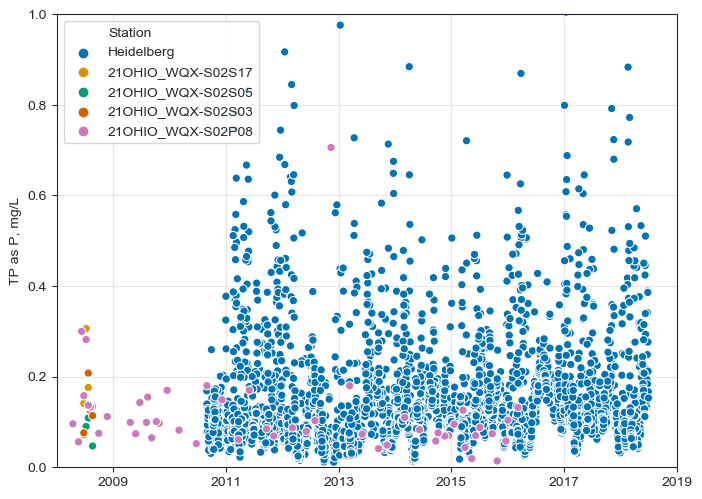

In [268]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=sp.Station.unique(),hue='Station', palette="colorblind")
plt.legend()
plt.ylim(0,1)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("TP as P, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage TP.pdf')

In [278]:
sp.groupby('Station')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_TP_stat.html')

### Portage River: Discharge

In [279]:
# portage_Q = hf.NWIS('04195820', 'dv', period='P55D')

site = '04195820'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
portage_Q = hf.extract_nwis_df(response.json())

In [280]:
portage_Q['Flow, CFS'] = portage_Q['USGS:04195820:00060:00003']
portage_Q= portage_Q.reset_index()
portage_Q['Date']  = portage_Q['datetime']
portage_Q['Date'] =pd.to_datetime(portage_Q['Date'], errors='coerce')
portage_Q = portage_Q[['Date', 'Flow, CFS']]
portage_Q['Source'] = 'NWIS'

In [281]:
portage_Q.describe()

,"Flow, CFS"
count,7398.000000
mean,545.027856
std,1200.039170
min,3.090000
25%,39.525000
50%,129.000000
75%,437.000000
max,13100.000000


In [282]:
df_Q_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Flow_Portage_River_data.csv')
df_Q_heideleberg['Date'] =pd.to_datetime(df_Q_heideleberg['Date'], errors='coerce')
df_Q_heideleberg['Source'] = 'Heidelberg'

In [283]:
df_Q_heideleberg.shape

(2673, 3)

In [284]:
portage_Q = portage_Q.append(df_Q_heideleberg)

In [320]:
portage_Q[portage_Q.Source=='NWIS'][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/Portage R/Flow_Portage_R_CFS.csv', index=False)

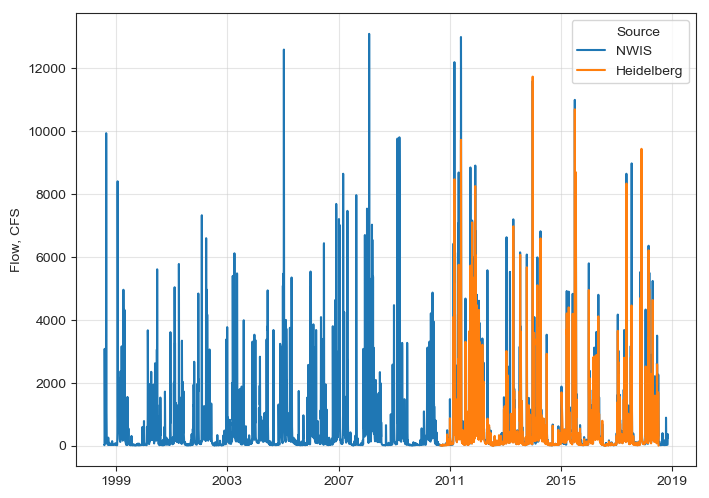

In [285]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.lineplot(x='Date', y='Flow, CFS', data=portage_Q, hue='Source')
plt.legend()
# plt.ylim(0,1)
# plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Flow, CFS")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')


In [287]:
portage_Q.groupby('Source')["Flow, CFS"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_Q_stat.html')

### Portage River: TN

In [303]:
WQP_name = "Kjeldahl nitrogen"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp = sp[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(69, 4)

In [304]:
WQP_name = "Inorganic nitrogen (nitrate and nitrite)"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
sp_1 = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp_1['ResultMeasureValue'] = pd.to_numeric(sp_1['ResultMeasureValue'])
sp_1 = sp_1[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp_1.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(68, 4)

In [305]:
sp_total = pd.merge(sp, sp_1, on=['ActivityStartDate', 'MonitoringLocationIdentifier'], how='inner')
sp_total['ResultMeasureValue'] = sp_total['ResultMeasureValue_x'] + sp_total['ResultMeasureValue_y']
sp_total = sp_total.groupby(['MonitoringLocationIdentifier','ActivityStartDate']).mean().reset_index()[['MonitoringLocationIdentifier','ActivityStartDate','ResultMeasureValue']].dropna()
# sp_total


In [336]:
df_heideleberg = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ncwqr.org/Portage_River_data.xlsx')

df_heideleberg['ActivityStartDate'] =pd.to_datetime(df_heideleberg['Datetime (date and time of sample collection)'], errors='coerce').dt.date
df_heideleberg['ResultMeasureValue'] = df_heideleberg['TKN, mg/L (Total Kjeldahl nitrogen)'] + df_heideleberg['NO23, mg/L as N']
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'

df_heideleberg = df_heideleberg[['ActivityStartDate','MonitoringLocationIdentifier','ResultMeasureValue']]


# df_heideleberg = df_heideleberg.groupby('ActivityStartDate').mean()
# df_heideleberg['code'] = 0
# df_heideleberg[['code','ResultMeasureValue']].to_csv('One_by_one/Western/US/Portage R/TN_Portage_River_data.csv')



In [337]:
df_N = df_heideleberg.append(sp_total)

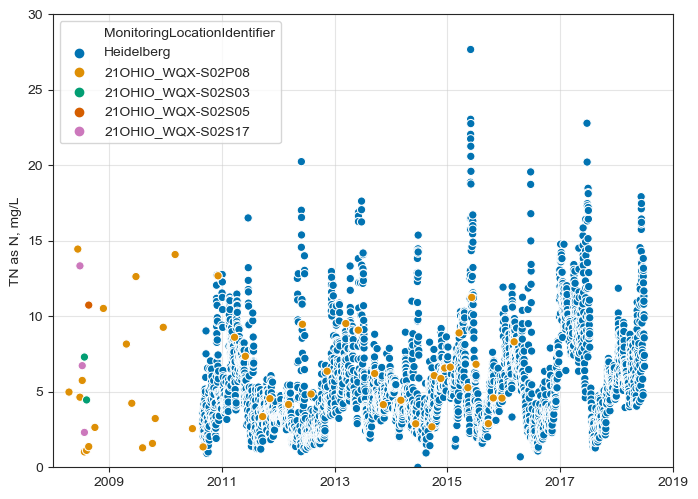

In [347]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=df_N,hue='MonitoringLocationIdentifier', palette="colorblind")
plt.legend()
plt.ylim(0,30)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("TN as N, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage TN.pdf')

In [350]:
csv_f = df_N[df_N.MonitoringLocationIdentifier == 'Heidelberg'].groupby('ActivityStartDate').mean()
csv_f = csv_f[csv_f['ResultMeasureValue']<30]
csv_f = csv_f[csv_f['ResultMeasureValue']>0]
csv_f['code'] = 0
csv_f[['code', 'ResultMeasureValue']].to_csv('One_by_one/Western/US/Portage R/TN_Portage_River_data.csv')

In [288]:
df_N.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_TN_stat.html')


### Portage: Chloride

In [289]:
WQP_name = "Chloride"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp = sp[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(68, 4)

In [290]:
df_heideleberg = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ncwqr.org/Portage_River_data.xlsx')

df_heideleberg['ActivityStartDate'] =pd.to_datetime(df_heideleberg['Datetime (date and time of sample collection)'], errors='coerce')
df_heideleberg['ResultMeasureValue'] = df_heideleberg['Chloride, mg/L']
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'
df_heideleberg = df_heideleberg[['MonitoringLocationIdentifier','ActivityStartDate','ResultMeasureValue']]


In [291]:
df_Cl = df_heideleberg.append(sp)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


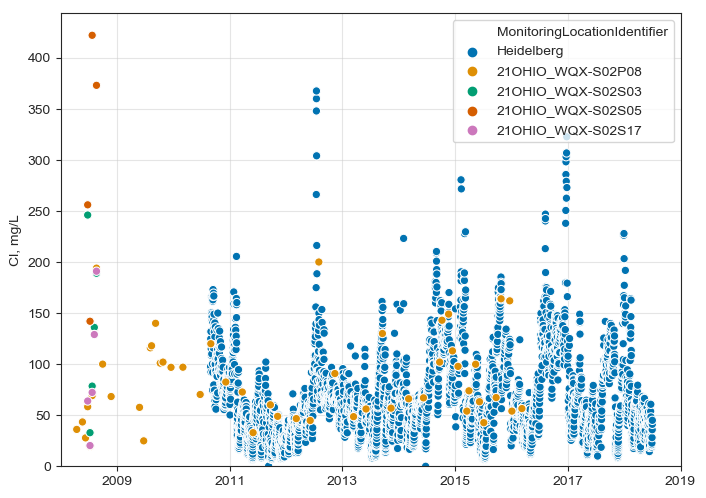

In [294]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=df_Cl,hue='MonitoringLocationIdentifier', palette="colorblind")
plt.legend()
plt.ylim(0,)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Cl, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage Cl.pdf')

In [295]:
df_Cl.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_Cl_stat.html')


### Portage: Silica

In [296]:
WQP_name = "Silica"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp = sp[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp.shape



(0, 4)

In [297]:
df_heideleberg = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ncwqr.org/Portage_River_data.xlsx')

df_heideleberg['ActivityStartDate'] =pd.to_datetime(df_heideleberg['Datetime (date and time of sample collection)'], errors='coerce')
df_heideleberg['ResultMeasureValue'] = df_heideleberg['Silica, mg/L']
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'
df_heideleberg = df_heideleberg[['MonitoringLocationIdentifier','ActivityStartDate','ResultMeasureValue']]


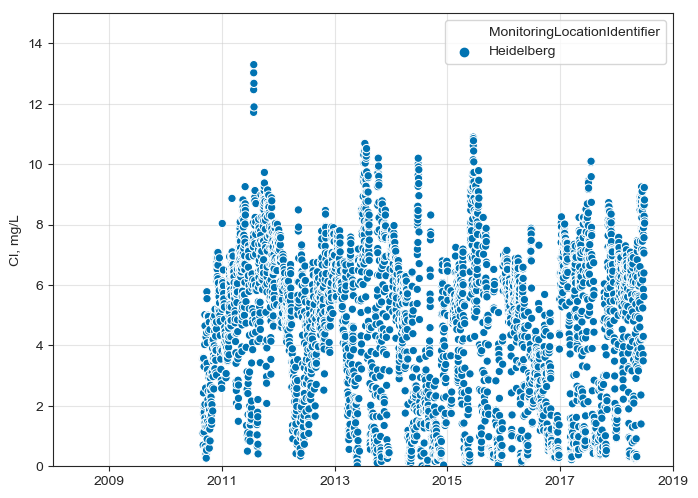

In [298]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=df_heideleberg,hue='MonitoringLocationIdentifier', palette="colorblind")
plt.legend()
plt.ylim(0,15)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Cl, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage Si.pdf')

In [299]:
df_heideleberg.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_Si_stat.html')
